<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Science</center>
# <center>2 - Tabular Data</center>
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Load and preprocess data

## 1.1 Load data

In [ ]:
import pandas as pd
telcoData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telco-Churn.csv', index_col='customerID', na_values=' ')

## 1.2 Check missing data

In [ ]:
# Work here

## 1.3 Fix missing data by filling with 0

In [ ]:
# Work here

## 1.4 Validate with there are no missing data

In [ ]:
# Work here

In [ ]:
telcoData.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# 2. Frequency table

## 2.1 Count

In [ ]:
pd.crosstab(telcoData['Churn'], columns='Count')

col_0,Count
Churn,
No,5174
Yes,1869


## 2.2 Normalized frequency table

In [ ]:
pd.crosstab(telcoData['Churn'], columns='Count', normalize='columns')

col_0,Count
Churn,
No,0.73463
Yes,0.26537


# 3. Barplot

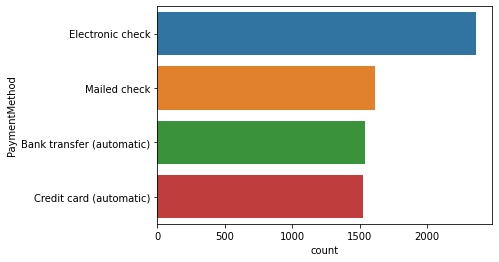

In [ ]:
import seaborn as sns
sns.countplot(data = telcoData, y = 'PaymentMethod')

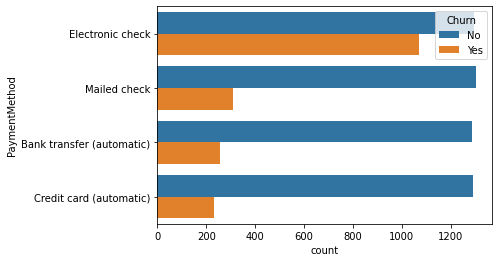

In [ ]:
sns.countplot(data = telcoData, y = 'PaymentMethod', hue = 'Churn')

# 4. Descriptive statisitcs

In [ ]:
telcoData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 5. Histogram

## 5.1 with Pandas

Text(0, 0.5, 'Frequency')

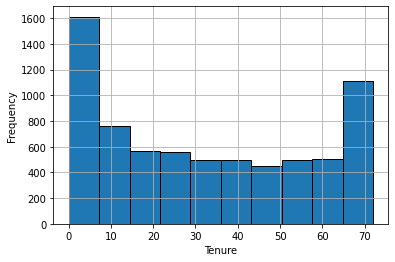

In [ ]:
import matplotlib.pyplot as plt
telcoData['tenure'].hist(edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

## 5.2 with seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


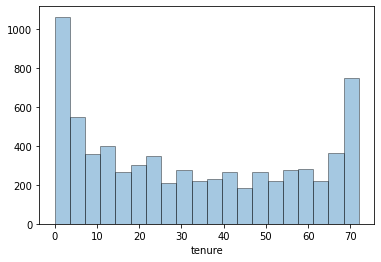

In [ ]:
sns.distplot(telcoData['tenure'], 
             bins=20, 
             kde=False, 
             hist_kws={'edgecolor':'black'})

# 6. Crosstab

## 6.1 Crosstab

In [ ]:
pd.crosstab( index = telcoData['Contract'],
             columns = telcoData['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


## 6.2 Normalized crosstab

In [ ]:
pd.crosstab( index = telcoData['Contract'],
             columns = telcoData['Churn'],
             normalize=True)

Churn,No,Yes
Contract,,
Month-to-month,0.315207,0.234985
One year,0.185574,0.023570
Two year,0.233849,0.006815


## 6.3 Pivot table

In [ ]:
import numpy as np
pd.pivot_table(data = telcoData,
               index = ['Contract','PaymentMethod'],
               columns = 'Churn',
               values = 'TotalCharges',
               aggfunc= np.size)\
  .apply(lambda x: x/sum(x), axis = 1)

Churn                                           No       Yes
Contract       PaymentMethod                                
Month-to-month Bank transfer (automatic)  0.658744  0.341256
               Credit card (automatic)    0.672192  0.327808
               Electronic check           0.462703  0.537297
               Mailed check               0.684211  0.315789
One year       Bank transfer (automatic)  0.902813  0.097187
               Credit card (automatic)    0.896985  0.103015
               Electronic check           0.815562  0.184438
               Mailed check               0.931751  0.068249
Two year       Bank transfer (automatic)  0.966312  0.033688
               Credit card (automatic)    0.977625  0.022375
               Electronic check           0.922619  0.077381
               Mailed check               0.992147  0.007853

# 7. Stacked bar chart

In [ ]:
telcoData['tenure_bin'] = pd.qcut(telcoData['tenure'], q = 5)

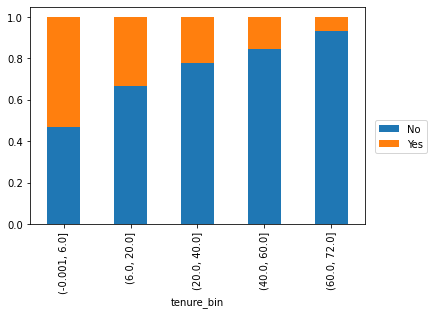

In [ ]:
churnByTenure = pd.crosstab(index = telcoData['tenure_bin'],
                            columns = telcoData['Churn'])\
                  .apply(lambda x: x/sum(x), axis = 1)
churnByTenure.plot.bar(stacked = True).legend(bbox_to_anchor=(1.2, 0.5))

# 8. Boxplot

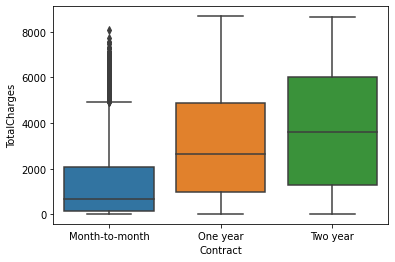

In [ ]:
sns.boxplot(data = telcoData, x = 'Contract', y = 'TotalCharges')

# 9. Scatter plot

## 9.1 Non-aggregated scatter plot

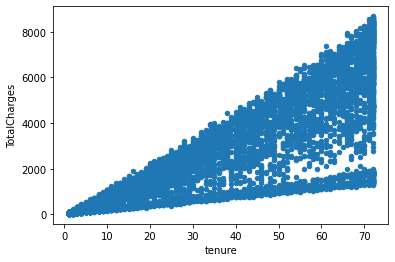

In [ ]:
telcoData.plot.scatter(x = 'tenure', y = 'TotalCharges')

## 9.2 Aggregated scatter plot

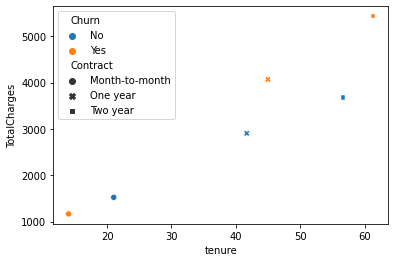

In [ ]:
telcoData1 = telcoData.groupby(['Contract','Churn'], as_index=False)\
                      .agg({'tenure':'mean', 'TotalCharges':'mean'})
sns.scatterplot(data = telcoData1, 
                x = 'tenure', 
                y = 'TotalCharges', 
                hue = 'Churn', 
                style = 'Contract')

# 10. Correlation

In [ ]:
telcoData.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# 11. Heatmap

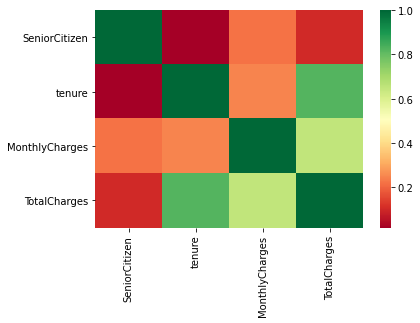

In [ ]:
sns.heatmap(telcoData.corr(), cmap = 'RdYlGn')

In [ ]:
x(t)=2+cos([2π/3]t)+4sin([5π/3]t)
x(t)

SyntaxError: ignored